<a href="https://colab.research.google.com/github/Divyaanshmertia/MNIST/blob/main/PCA_and_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Principal Component Analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ML/mnist_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape


(60000, 785)

In [ ]:
target = train['label']
train = train.drop("label", axis = 1)

In [ ]:
idx = 718
digit_data = train.iloc[idx]
digit_image = digit_data.values.reshape(28, 28)


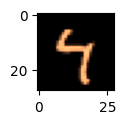

In [ ]:
plt.figure(figsize=(1, 1))
plt.imshow(digit_image, cmap = 'copper')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
import random


In [ ]:
X = train.values
X_std = StandardScaler().fit_transform(X)

covarience_matrix = np.cov(X_std, rowvar = False)
covarience_matrix.shape

(784, 784)

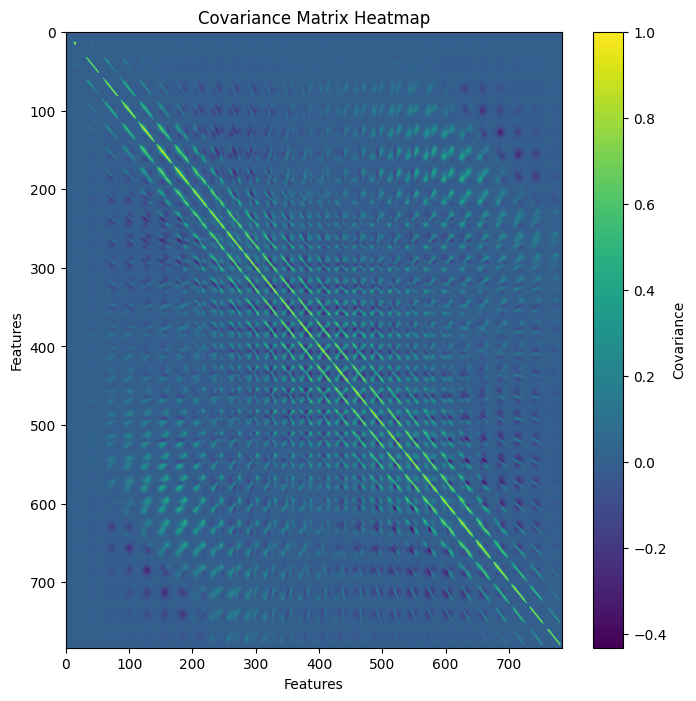

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(covarience_matrix, aspect='auto')
plt.colorbar(label='Covariance')
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

# Performing SVD

In [ ]:
U, S, Vt = np.linalg.svd(X_std, full_matrices=False)
explained_variance_ratio = (S ** 2) / np.sum(S ** 2)


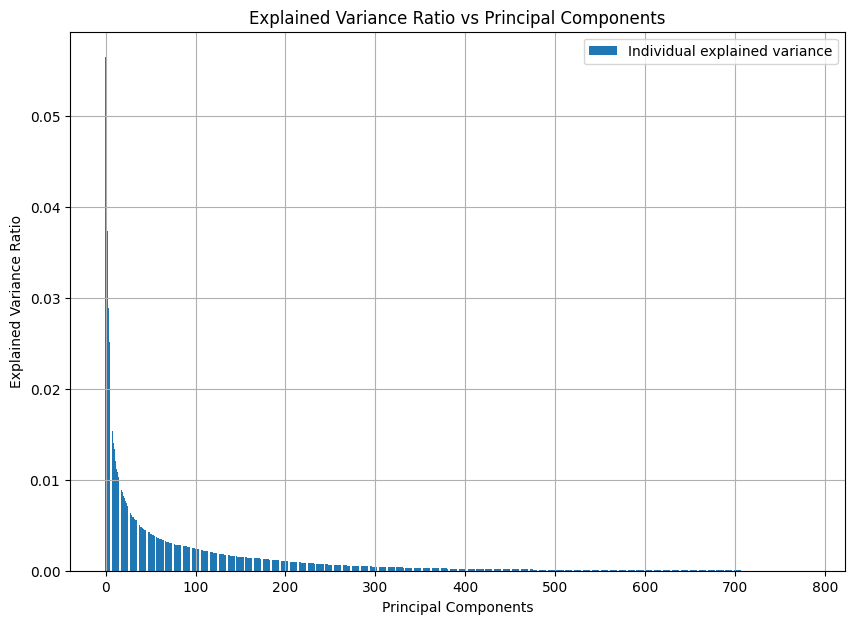

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, label='Individual explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio vs Principal Components')
plt.legend(loc='best')
plt.grid()
plt.show()


Calculating cummulative explained variance ratio and visualizing it.

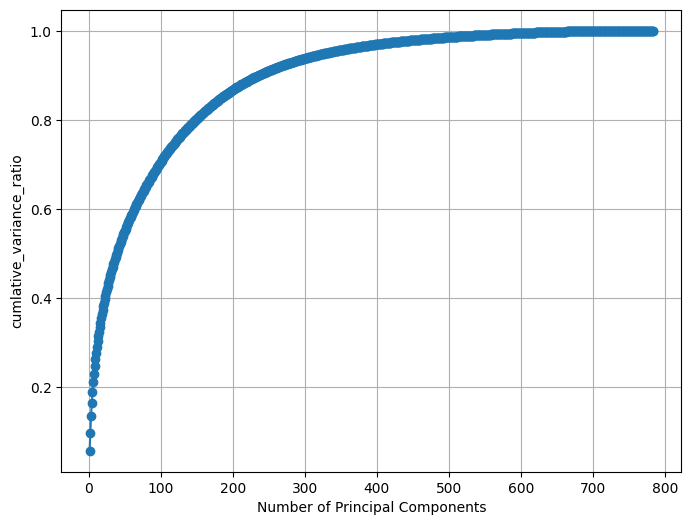

In [ ]:
cumlative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize = (8,6))
plt.plot(range(1, len(cumlative_variance_ratio)+1), cumlative_variance_ratio, marker = 'o', linestyle = '-')
plt.xlabel('Number of Principal Components')
plt.ylabel('cumlative_variance_ratio')
plt.grid()
plt.show()

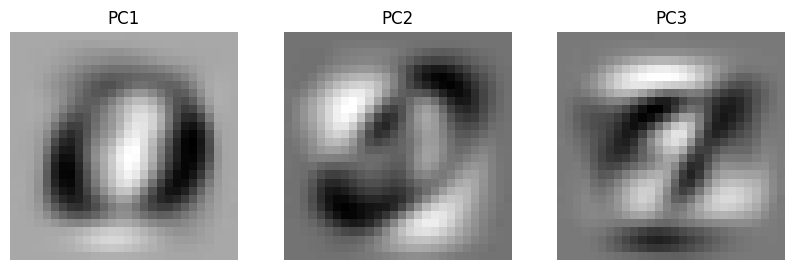

In [ ]:
n_components = 3
fig, axes = plt.subplots(1, n_components, figsize=(10, 5))

for i in range(n_components):
    axes[i].imshow(Vt[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'PC{i+1}')
    axes[i].axis('off')

plt.show()


# Function to convert to n - Dimensions

In [ ]:
def reduce_dimensions(d):
  reduced_data = np.dot(X_std, Vt.T[:, :d])
  reduced_data.shape
  return reduced_data

In [ ]:
from sklearn.mixture import GaussianMixture


In [ ]:
def gmm_clustering(dataset, num_of_clusters):
  gmm = GaussianMixture(n_components = num_of_clusters)
  gmm.fit(dataset)
  cluster_assignments = gmm.predict(dataset)
  return cluster_assignments

In [ ]:
def visualize_cluster(cluster_assignments,k):
  fig, axs = plt.subplots(k, 5, figsize=(12, 2 * k))

  for i in range(k):
    cluster_indices = np.where(cluster_assignments == i)[0]

    random_indices = random.sample(list(cluster_indices), min(5, len(cluster_indices)))

    for j, idx in enumerate(random_indices):
        image = X_std[idx].reshape(28, 28)
        axs[i, j].imshow(image, cmap='copper')
        axs[i, j].set_title(f'Image {j+1}')
        axs[i, j].axis('off')

  plt.tight_layout()
  plt.show()

In [ ]:
def do_clustering_with_d_dimension(dimension):
  for k in [4,7,10]:
    print(f"******-------------------------**now Showing images with {k} clusters**-------------------------------******")
    reduced_data = reduce_dimensions(dimension)
    cluster_assignments = gmm_clustering(reduced_data, k)
    visualize_cluster(cluster_assignments, k)

#For 128 Components  

******-------------------------**now Showing images with 4 clusters**-------------------------------******


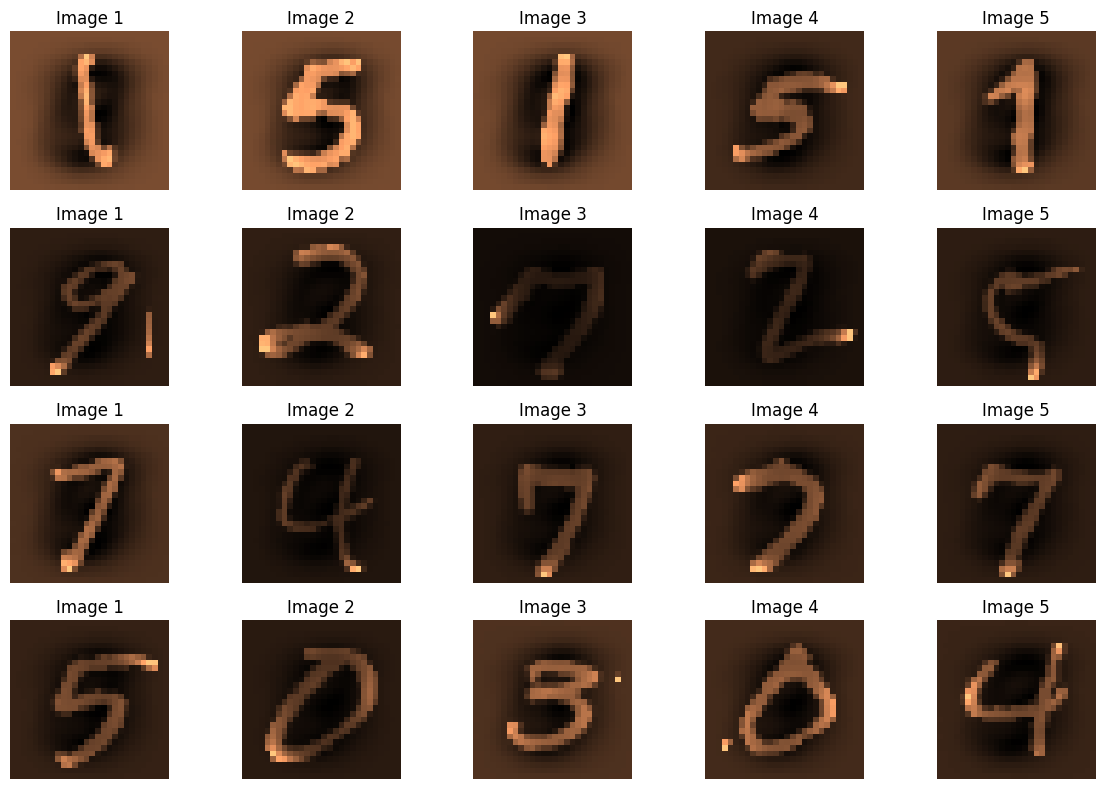

******-------------------------**now Showing images with 7 clusters**-------------------------------******


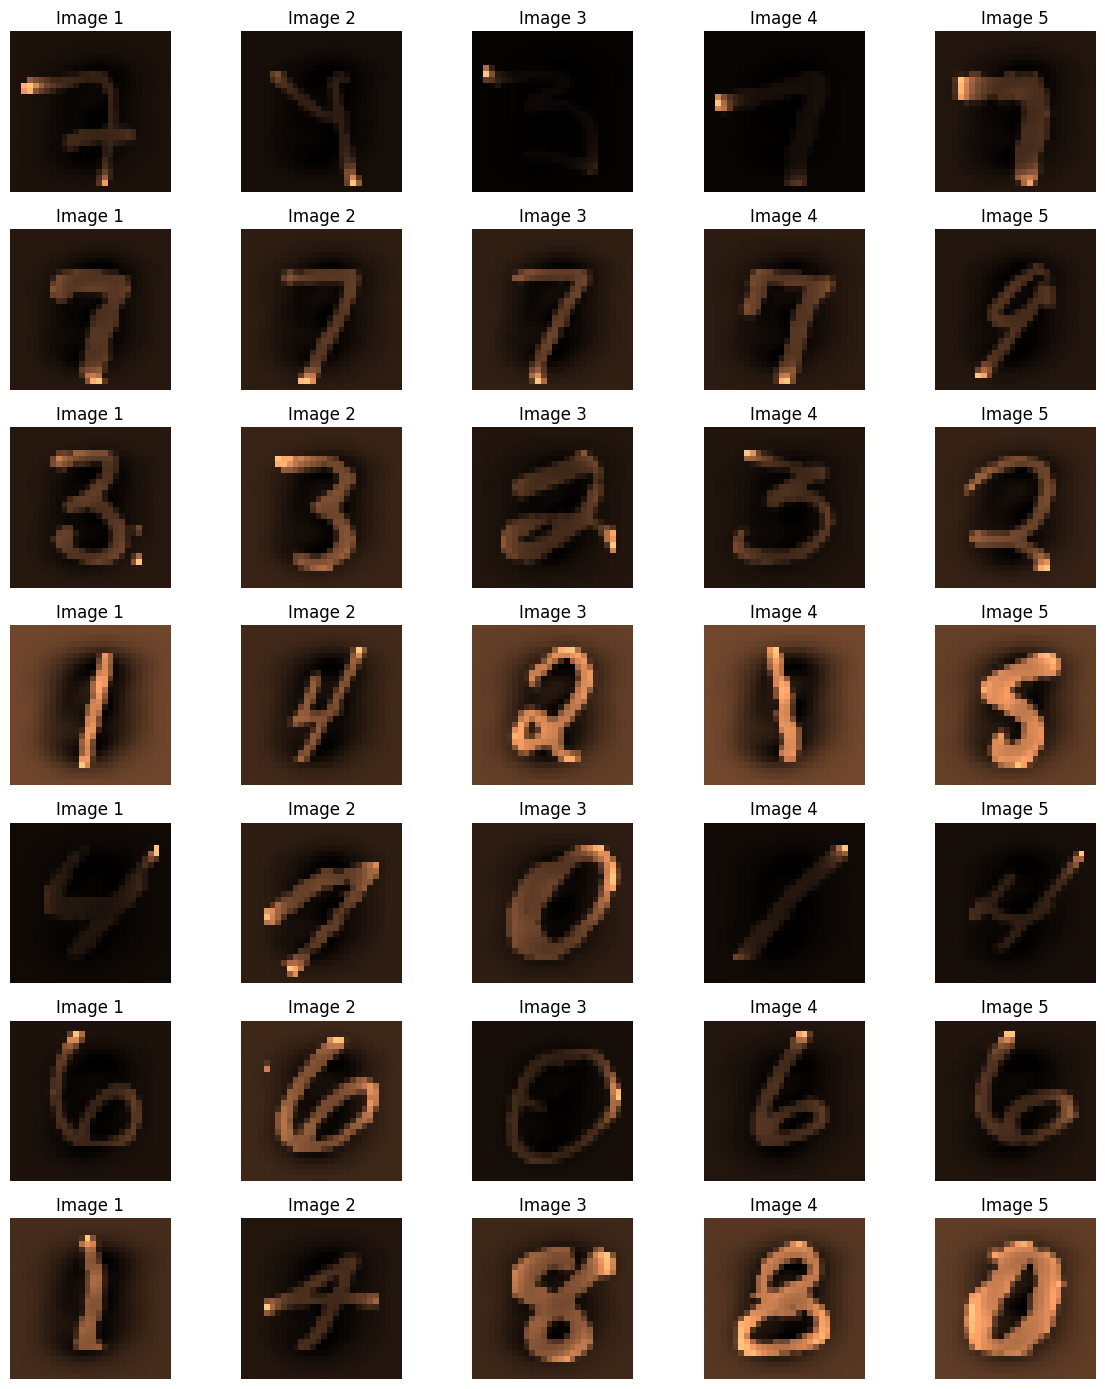

******-------------------------**now Showing images with 10 clusters**-------------------------------******


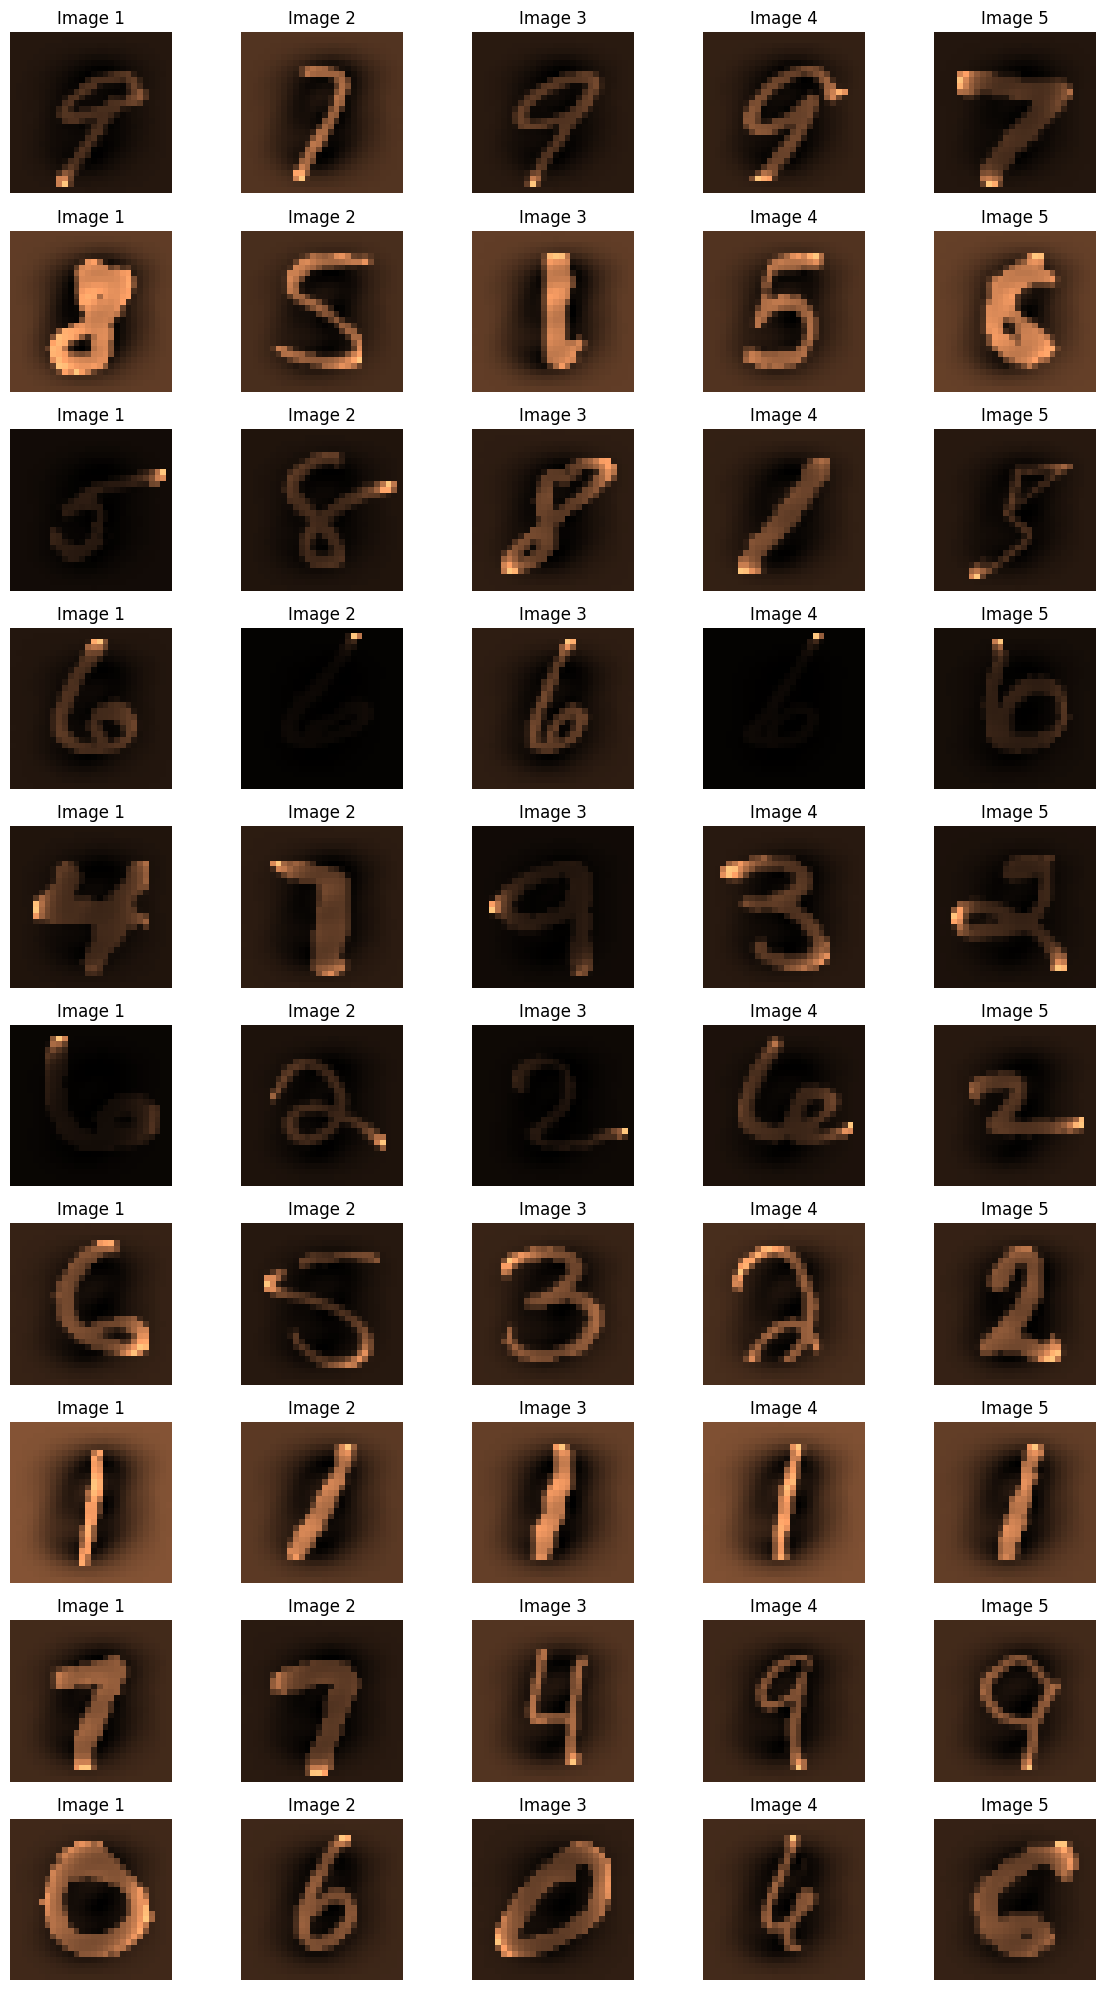

In [ ]:
do_clustering_with_d_dimension(128)

# For 64 Components

******-------------------------**now Showing images with 4 clusters**-------------------------------******


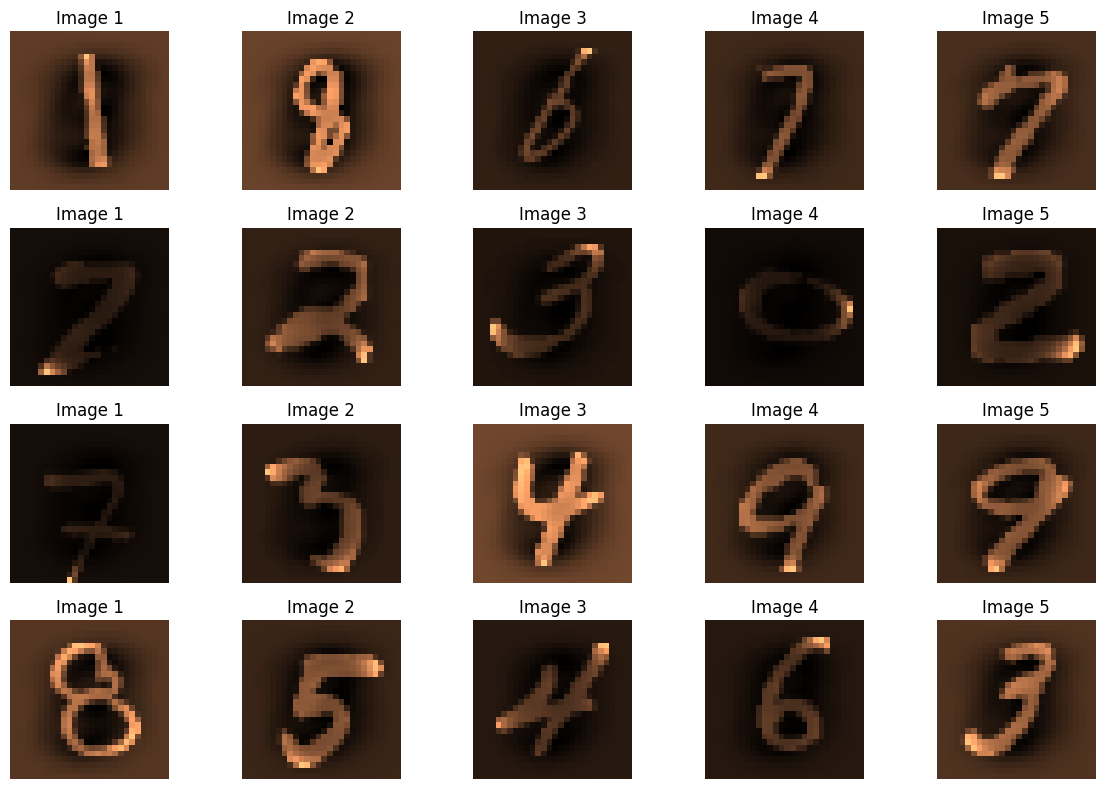

******-------------------------**now Showing images with 7 clusters**-------------------------------******


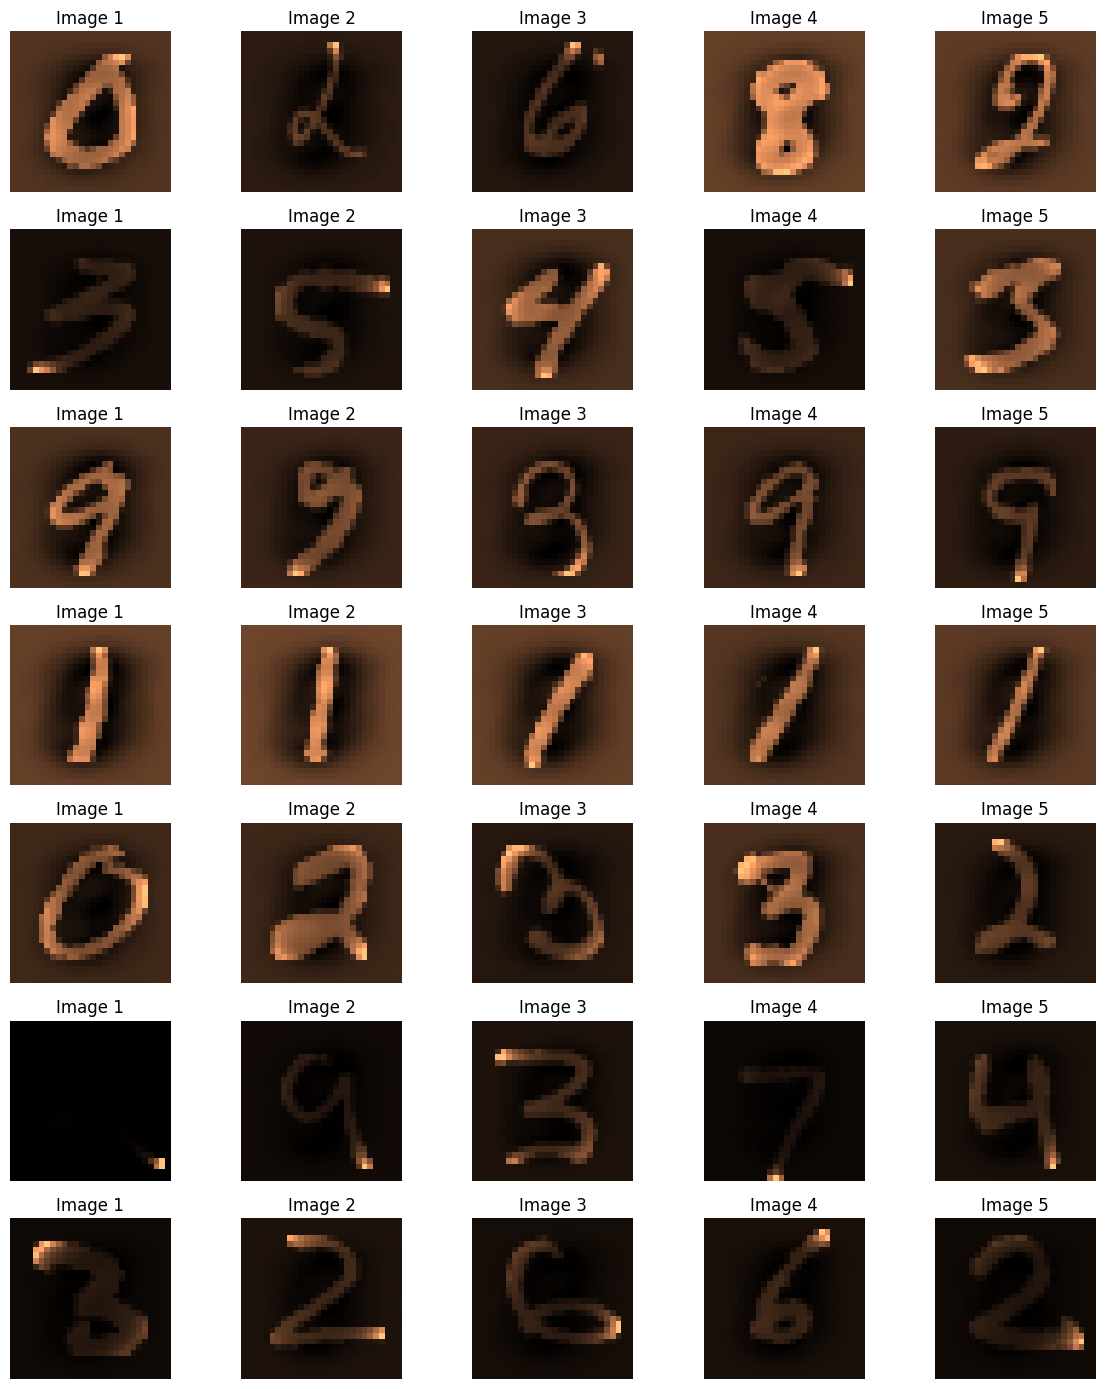

******-------------------------**now Showing images with 10 clusters**-------------------------------******


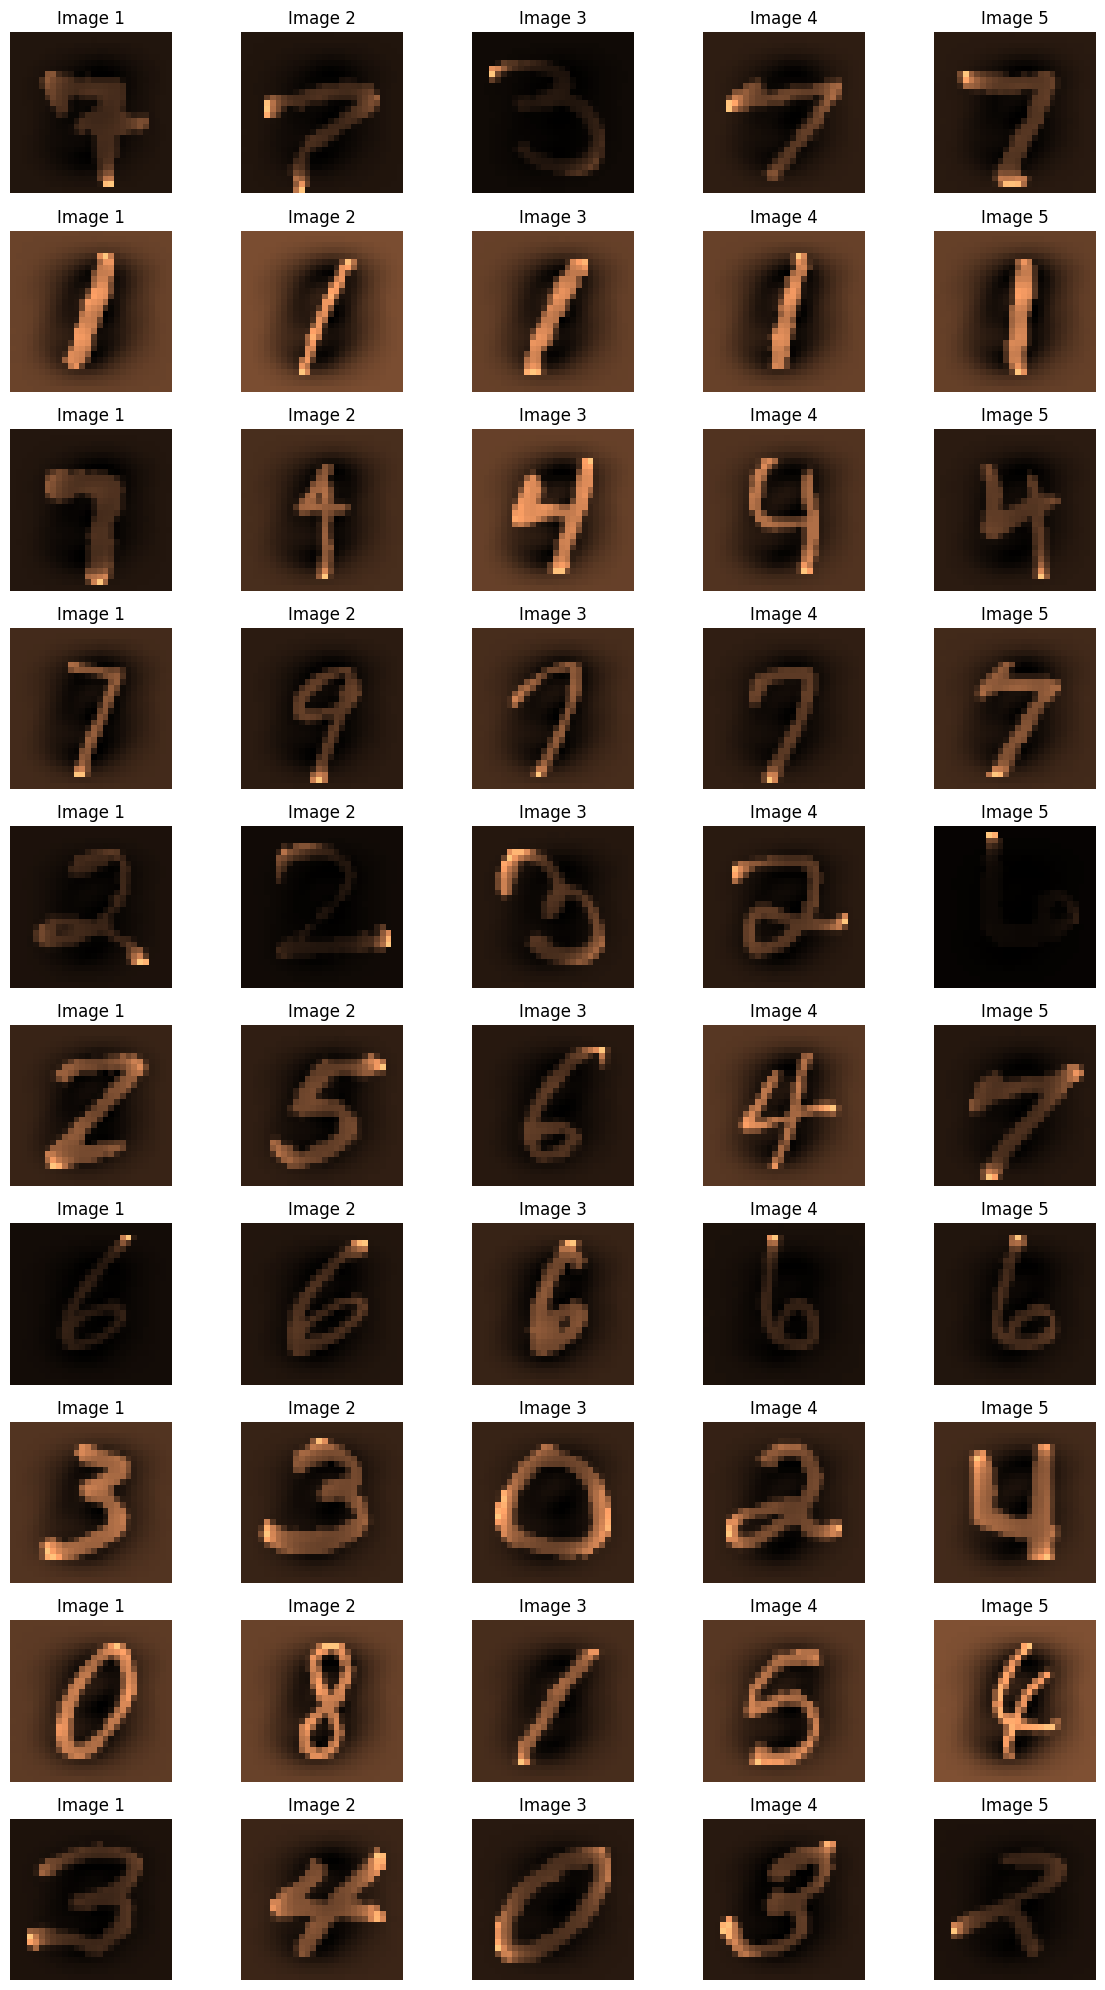

In [ ]:
do_clustering_with_d_dimension(64)

#For 32 Components

******-------------------------**now Showing images with 4 clusters**-------------------------------******


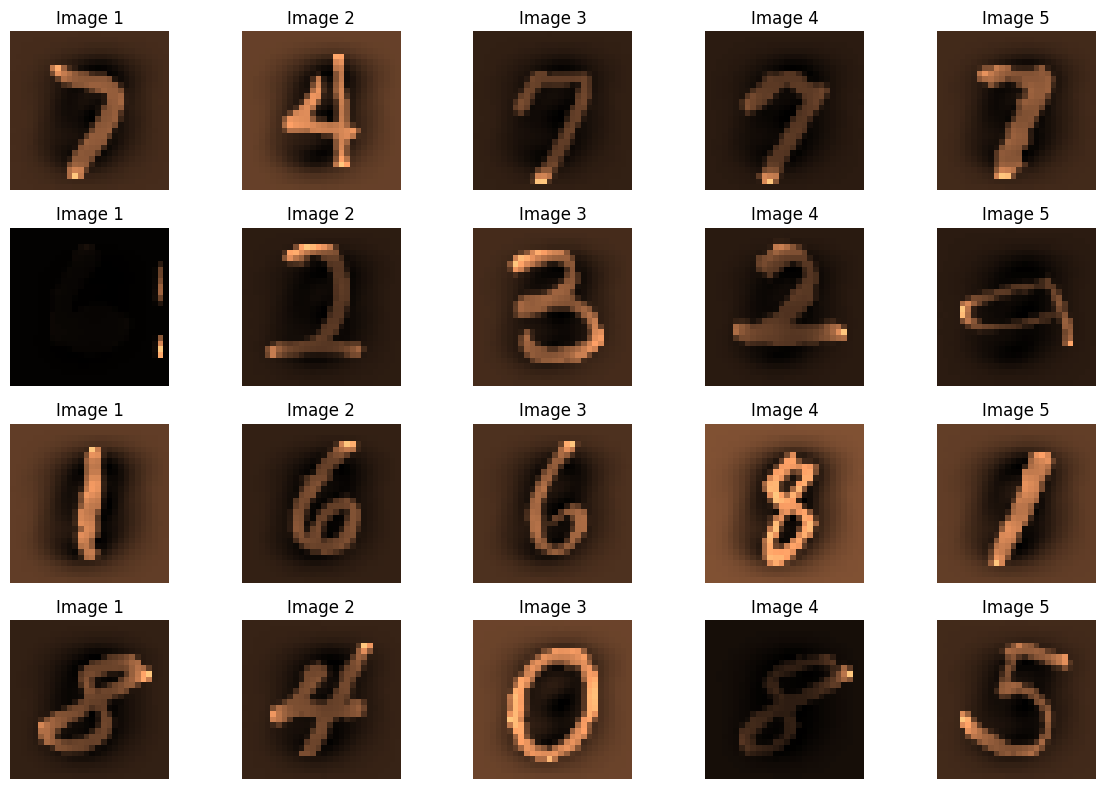

******-------------------------**now Showing images with 7 clusters**-------------------------------******


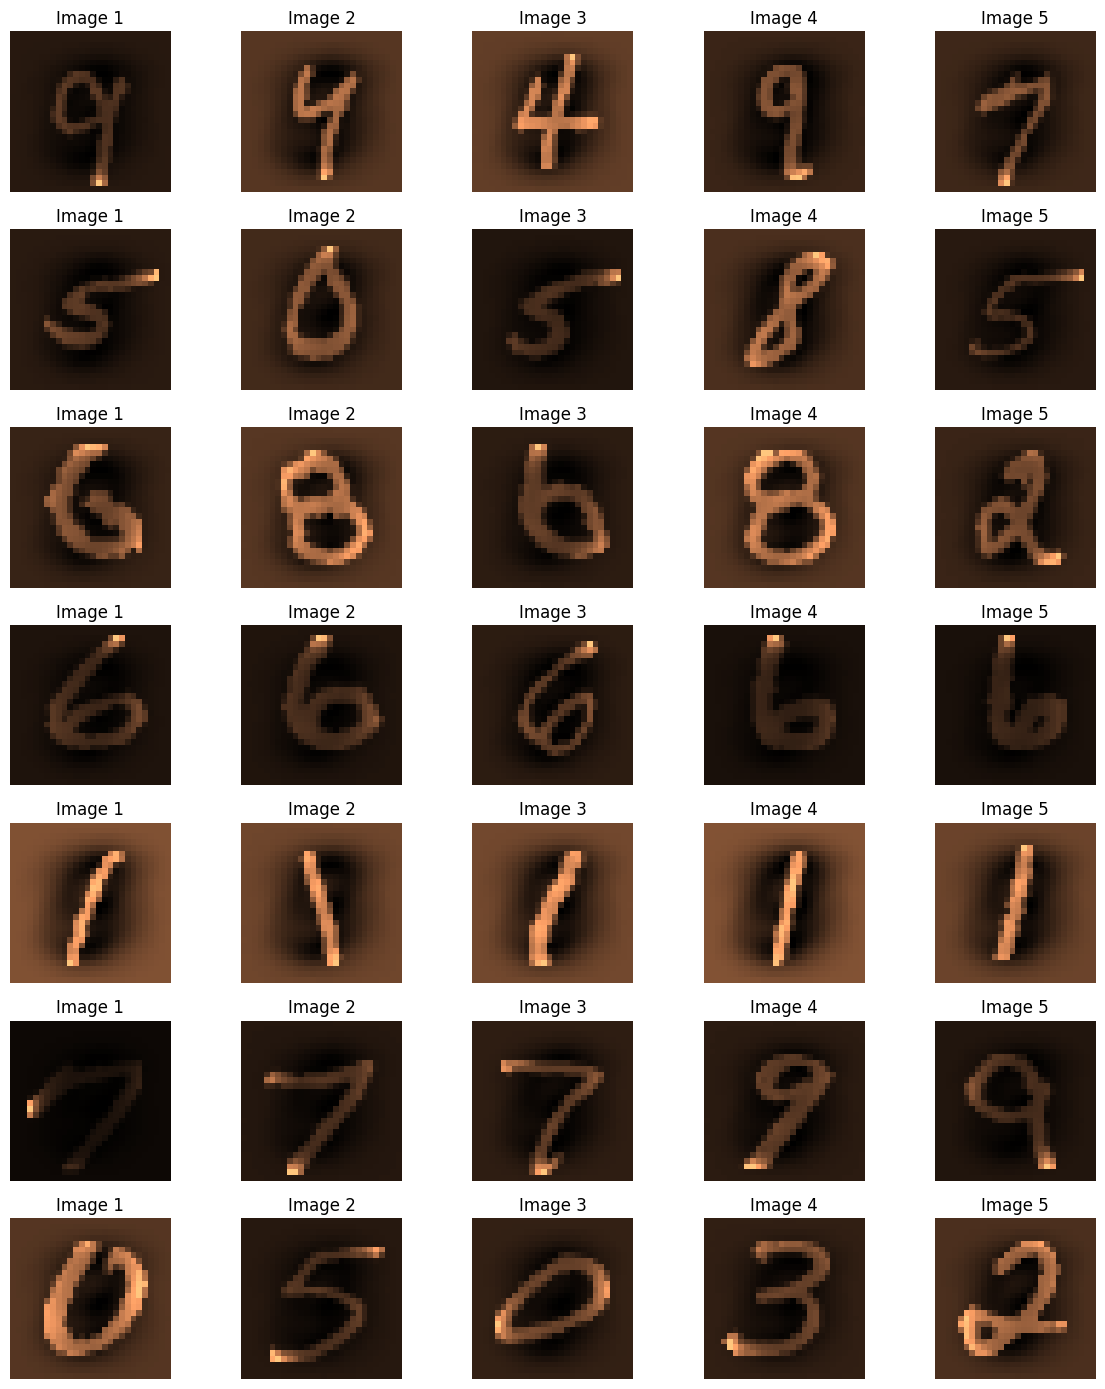

******-------------------------**now Showing images with 10 clusters**-------------------------------******


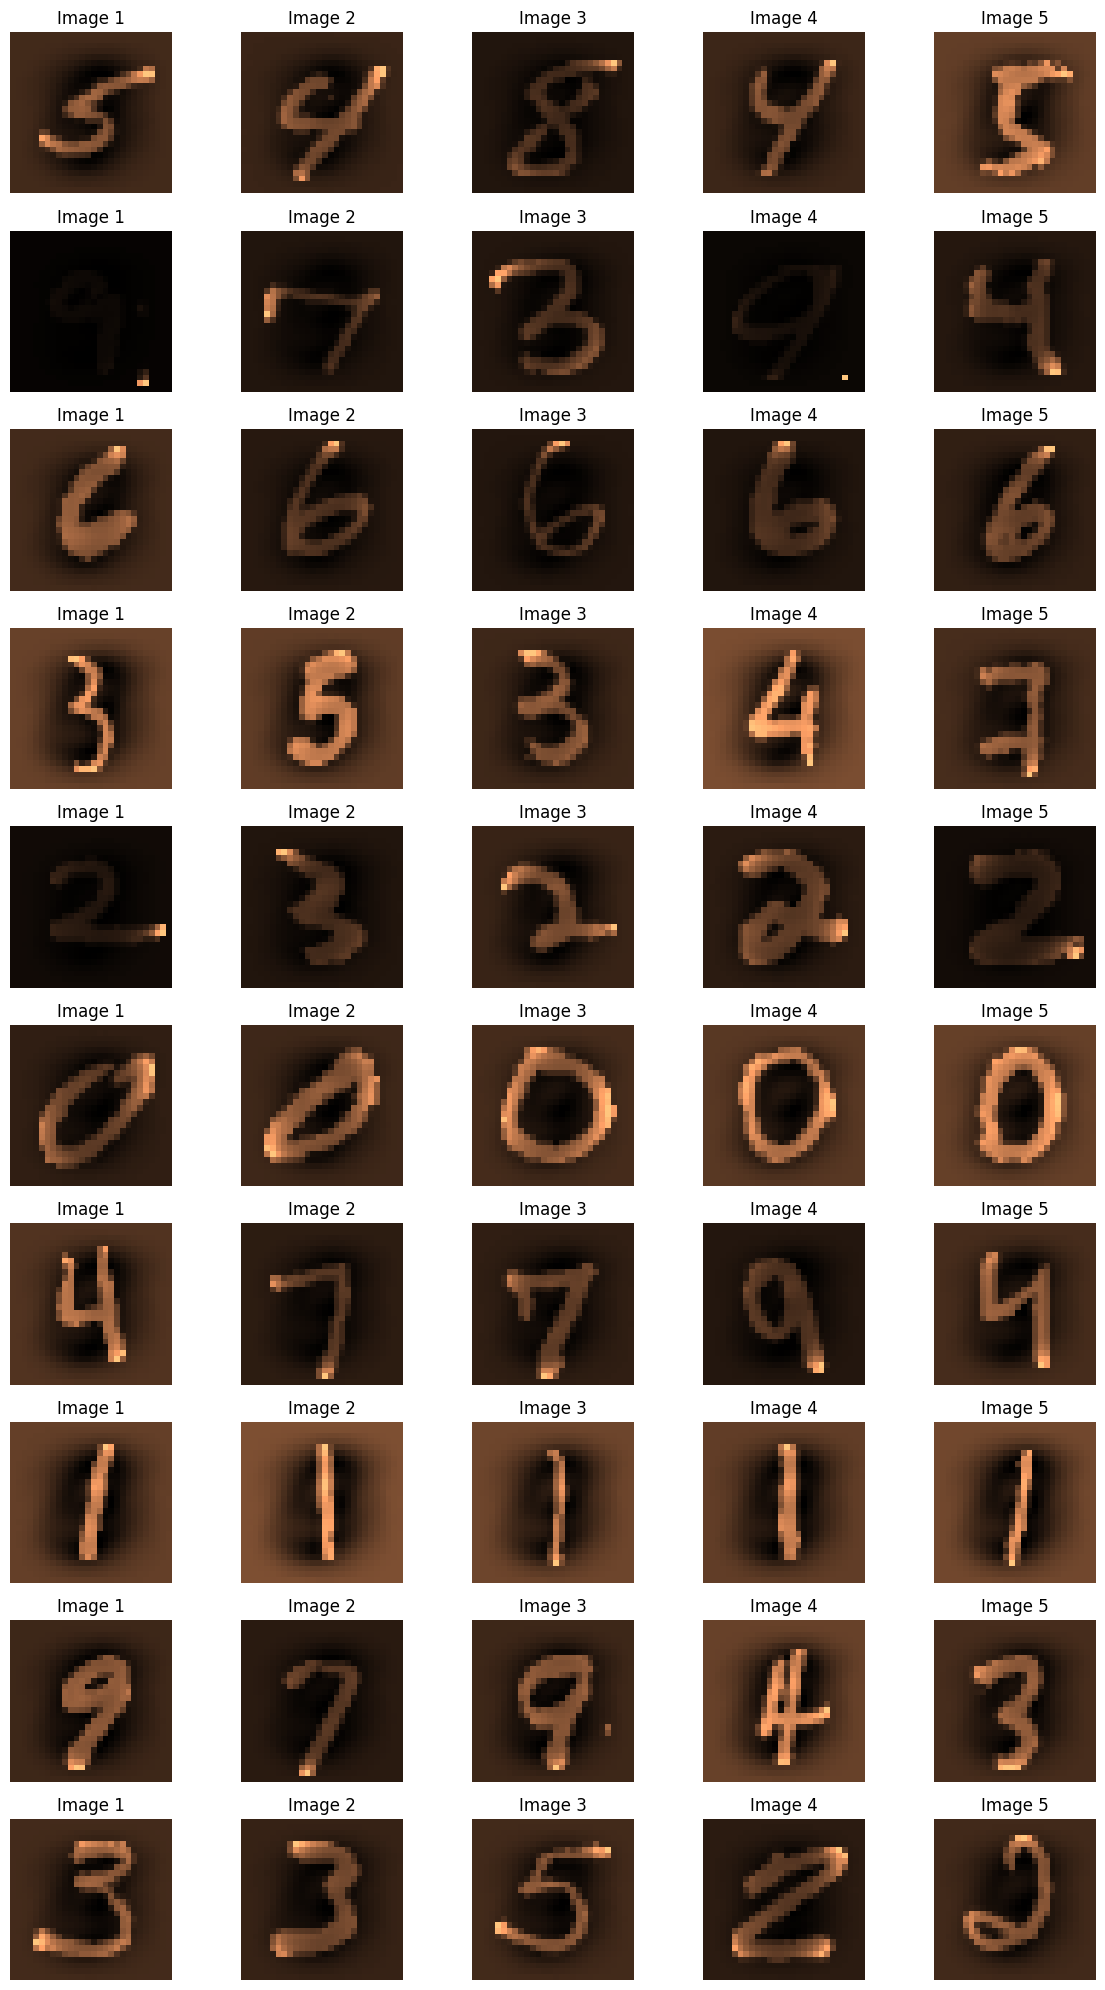

In [ ]:
do_clustering_with_d_dimension(32)